## Beautiful Soup

### LaForet

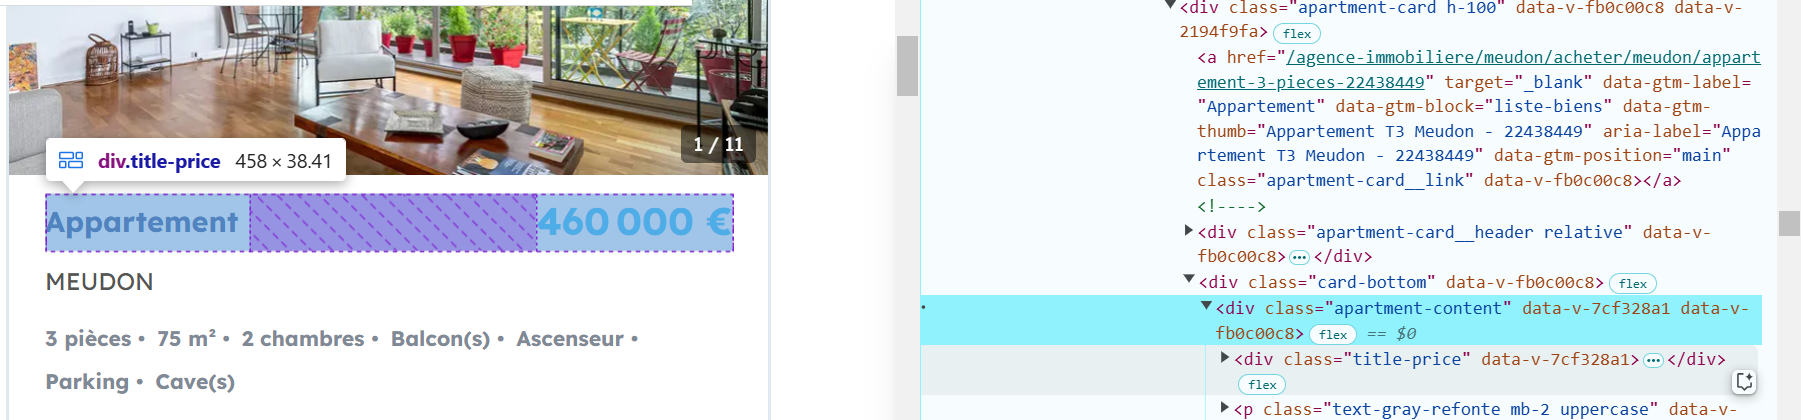

In [1]:
from bs4 import BeautifulSoup
import requests as rq

urlbase = 'https://www.laforet.com'
city = 'meudon'
urlbuy = f'/agence-immobiliere/{city}/acheter'
page = rq.get(urlbase+urlbuy)
soup = BeautifulSoup(page.content, "html.parser")

In [11]:
link = [a['href'] for a in soup.find_all(class_="apartment-card__link")]
link

['/agence-immobiliere/meudon/acheter/meudon/appartement-5-pieces-22444479',
 '/agence-immobiliere/meudon/acheter/meudon/appartement-3-pieces-22438449',
 '/agence-immobiliere/meudon/acheter/meudon/maison-5-pieces-22438319',
 '/agence-immobiliere/meudon/acheter/meudon/appartement-4-pieces-22263574',
 '/agence-immobiliere/meudon/acheter/meudon/appartement-3-pieces-21631764',
 '/agence-immobiliere/meudon/acheter/meudon/appartement-2-pieces-21625168',
 '/agence-immobiliere/meudon/acheter/clamart/appartement-3-pieces-22456728',
 '/agence-immobiliere/meudon/acheter/meudon/appartement-2-pieces-22317448',
 '/agence-immobiliere/meudon/acheter/meudon/appartement-4-pieces-22312127',
 '/agence-immobiliere/meudon/acheter/meudon/maison-4-pieces-22249893',
 '/agence-immobiliere/meudon/acheter/meudon/appartement-5-pieces-22245355',
 '/agence-immobiliere/meudon/acheter/meudon/appartement-2-pieces-22075869',
 '/agence-immobiliere/meudon/acheter/meudon/maison-8-pieces-4958472']

In [12]:
prop = soup.find_all(class_="card-bottom")
len(prop)

13

In [13]:
prop[0]

<div class="card-bottom" data-v-fb0c00c8=""><div class="apartment-content" data-v-7cf328a1="" data-v-fb0c00c8=""><div class="title-price" data-v-7cf328a1=""><span class="apartment__label" data-v-7cf328a1="">
      Appartement
    </span> <div class="flex" data-v-7cf328a1=""><span class="apartment__price" data-v-7cf328a1="">
        795 000 €
      </span> <!-- --></div></div> <p class="text-gray-refonte mb-2 uppercase" data-v-7cf328a1=""><span data-v-7cf328a1="">Meudon
      <!-- --></span></p> <div class="group-flex mb-2" data-v-7cf328a1=""><div class="font-bold text-sm" data-v-7cf328a1="">
      5 pièces
      <span data-v-7cf328a1="">•</span></div><div class="font-bold text-sm" data-v-7cf328a1="">
      117 m²
      <span data-v-7cf328a1="">•</span></div><div class="font-bold text-sm" data-v-7cf328a1="">
      3 chambres
      <span data-v-7cf328a1="">•</span></div><div class="font-bold text-sm" data-v-7cf328a1="">
      Balcon(s)
      <span data-v-7cf328a1="">•</span></div><div cl

In [14]:
for c in prop[0].find(class_="title-price").children:
    print(c.text)


      Appartement
    
 

        795 000 €
       


In [15]:
l0 = [c.text.strip().replace('\u202f', '').replace('\xa0', '') for c in prop[0].find(class_="title-price").children]
l0

['Appartement', '', '795000€']

In [16]:
i = prop[0].find(class_="title-price").children # iterator
prop_type = next(i).text.strip()
space = next(i)
price = next(i).text.strip().replace('\u202f', '').replace('\xa0€', '')
prop_type,price

('Appartement', '795000')

In [17]:
for p in prop[0].find_all('p'):
    print(p.text)

Meudon
      


In [19]:
for c in prop[0].find(class_='group-flex').children:
    print(c.get_text(strip=True).replace('•', ''))

5 pièces
117 m²
3 chambres
Balcon(s)
Ascenseur
Parking
Cave(s)


In [25]:
import re
from bs4 import BeautifulSoup

def get_prop(prop, urlbase = "https://www.laforet.com"):
    # Extract the type from the <span> with class 'apartment__label'
    type_tag = prop.find('span', class_='apartment__label')
    type_ = type_tag.get_text(strip=True) if type_tag else 'N/A'

    # Extract the price from the <span> with class 'apartment__price'
    price_tag = prop.find('span', class_='apartment__price')
    if price_tag:
        price_text = price_tag.get_text(strip=True)
        # Remove non-breaking spaces and the euro symbol
        price_numeric = price_text.replace('\u202f', '').replace('\xa0€', '').replace('€', '').replace(' ', '')
        try:
            price = int(price_numeric)
        except ValueError:
            price = 0  # Default value if conversion fails
    else:
        price = 0  # Default value if price_tag is not found

    # Extract features from the 'group-flex' div
    group_flex = prop.find('div', class_='group-flex')
    features = group_flex.find_all('div', class_='font-bold text-sm') if group_flex else []

    # Initialize variables
    rooms = size = bed = 0

    # Iterate through each feature and assign appropriately using regex
    for feature in features:
        text = feature.get_text(strip=True).lower()
        # Extract digits using regex
        number_match = re.search(r'(\d+)', text)
        number = int(number_match.group(1)) if number_match else 0

        if 'pièce' in text:
            rooms = number
        elif 'm²' in text or 'm2' in text:
            size = number
        elif 'chambre' in text:
            bed = number

    # Extract the link from the parent 'apartment-card' div's <a> tag
    apartment_card = prop.find_parent('div', class_='apartment-card')
    if apartment_card:
        a_tag = apartment_card.find('a', href=True)
        link = urlbase + a_tag['href'] if a_tag else 'N/A'
    else:
        link = 'N/A'

    return [type_, price, size, rooms, bed, link]

In [26]:
prop = soup.find_all(class_="card-bottom")
get_prop(prop[0]),get_prop(prop[1])

(['Appartement',
  795000,
  117,
  5,
  3,
  'https://www.laforet.com/agence-immobiliere/meudon/acheter/meudon/appartement-5-pieces-22444479'],
 ['Appartement',
  460000,
  75,
  3,
  2,
  'https://www.laforet.com/agence-immobiliere/meudon/acheter/meudon/appartement-3-pieces-22438449'])

In [27]:
for p in prop:
    print(get_prop(p))

['Appartement', 795000, 117, 5, 3, 'https://www.laforet.com/agence-immobiliere/meudon/acheter/meudon/appartement-5-pieces-22444479']
['Appartement', 460000, 75, 3, 2, 'https://www.laforet.com/agence-immobiliere/meudon/acheter/meudon/appartement-3-pieces-22438449']
['Maison', 940000, 130, 5, 3, 'https://www.laforet.com/agence-immobiliere/meudon/acheter/meudon/maison-5-pieces-22438319']
['Appartement', 510000, 94, 4, 3, 'https://www.laforet.com/agence-immobiliere/meudon/acheter/meudon/appartement-4-pieces-22263574']
['Appartement', 539000, 72, 3, 2, 'https://www.laforet.com/agence-immobiliere/meudon/acheter/meudon/appartement-3-pieces-21631764']
['Appartement', 299000, 43, 2, 1, 'https://www.laforet.com/agence-immobiliere/meudon/acheter/meudon/appartement-2-pieces-21625168']
['Appartement', 265000, 57, 3, 2, 'https://www.laforet.com/agence-immobiliere/meudon/acheter/clamart/appartement-3-pieces-22456728']
['Appartement', 200000, 30, 2, 1, 'https://www.laforet.com/agence-immobiliere/meudo

In [28]:
import pandas as pd
pd.DataFrame([get_prop(p) for p in prop],columns=['type','price','size', 'rooms', 'bed','link'])

,type,price,size,rooms,bed,link
0,Appartement,795000,117,5,3,https://www.laforet.com/agence-immobiliere/meu...
1,Appartement,460000,75,3,2,https://www.laforet.com/agence-immobiliere/meu...
2,Maison,940000,130,5,3,https://www.laforet.com/agence-immobiliere/meu...
3,Appartement,510000,94,4,3,https://www.laforet.com/agence-immobiliere/meu...
4,Appartement,539000,72,3,2,https://www.laforet.com/agence-immobiliere/meu...
5,Appartement,299000,43,2,1,https://www.laforet.com/agence-immobiliere/meu...
6,Appartement,265000,57,3,2,https://www.laforet.com/agence-immobiliere/meu...
7,Appartement,200000,30,2,1,https://www.laforet.com/agence-immobiliere/meu...
8,Appartement,650000,101,4,3,https://www.laforet.com/agence-immobiliere/meu...
9,Maison,499000,74,4,2,https://www.laforet.com/agence-immobiliere/meu...


### Century 21

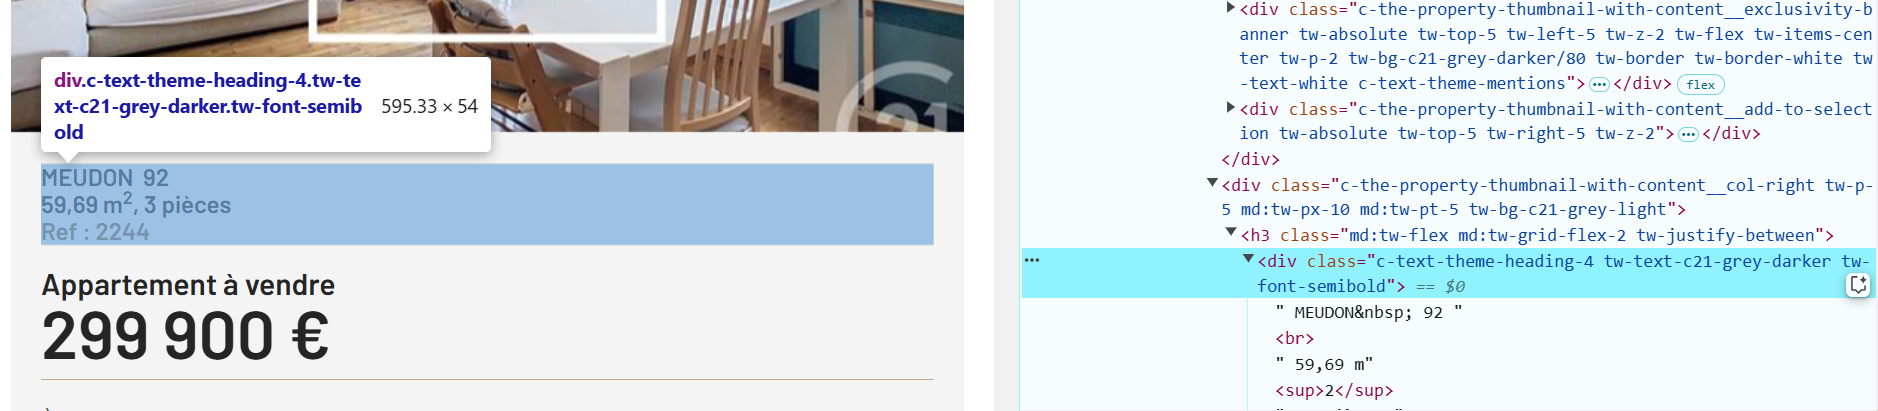

In [2]:
from bs4 import BeautifulSoup
import requests as rq

urlbase = 'https://www.century21-adc-meudon.com/'
urlbuy = 'annonces/achat/'
page = rq.get(urlbase+urlbuy)
soup = BeautifulSoup(page.content, "html.parser")

In [3]:
prop = soup.find_all(class_="c-the-property-thumbnail-with-content")
len(prop)

19

In [4]:
prop[0].img

<img alt="Appartement F2 à vendre MEUDON" class="tw-absolute tw-inset-0 tw-z-1 tw-w-full tw-h-full tw-object-cover" height="480" src="/imagesBien/s3/202/3350/c21_202_3350_2320_8_AEBED885-D2E6-4CF1-A7B8-DFCB4B361887.jpg" width="640"/>

In [5]:
prop[0].a

<a aria-label="Appartement F2 à vendre MEUDON" href="/trouver_logement/detail/11935267686/">
<img alt="Appartement F2 à vendre MEUDON" class="tw-absolute tw-inset-0 tw-z-1 tw-w-full tw-h-full tw-object-cover" height="480" src="/imagesBien/s3/202/3350/c21_202_3350_2320_8_AEBED885-D2E6-4CF1-A7B8-DFCB4B361887.jpg" width="640"/>
</a>

In [6]:
link = [k.a['href'] for k in prop]
link

['/trouver_logement/detail/11935267686/',
 '/trouver_logement/detail/10941454552/',
 '/trouver_logement/detail/12156609857/',
 '/trouver_logement/detail/6199620306/',
 '/trouver_logement/detail/12331236451/',
 '/trouver_logement/detail/11758992463/',
 '/trouver_logement/detail/10703062543/',
 '/trouver_logement/detail/9369269953/',
 '/trouver_logement/detail/7586233809/',
 '/trouver_logement/detail/4877977258/',
 '/trouver_logement/detail/5526787592/',
 '/trouver_logement/detail/2051609192/',
 '/trouver_logement/detail/1828051816/',
 '/trouver_logement/detail/11993664077/',
 '/trouver_logement/detail/6807666728/',
 '/trouver_logement/detail/9203377699/',
 '/trouver_logement/detail/9723499947/',
 '/trouver_logement/detail/11531060682/',
 '/trouver_logement/detail/12123923284/']

In [18]:
soup.find_all(class_="c-text-theme-heading-4 tw-text-c21-grey-darker tw-font-semibold")[0].get_text(strip=True)

'MEUDON\xa0\n          \n          9242,60 m2, 2 piècesRef : 2320'

In [17]:
h = soup.find_all(class_="c-text-theme-heading-4 tw-text-c21-grey-darker tw-font-semibold")
h.__len__()

19

In [25]:
# h[0].get_text(strip=True)
title = [k.get_text() for k in h]
# title.__len__()
title

['\n          \n            MEUDON\xa0\n          \n          92\n        \n\n        42,60 m2, 2 pièces\n\n        \n          Ref : 2320\n        \n',
 '\n          \n            MEUDON\xa0\n          \n          92\n        \n\n        59,69 m2, 3 pièces\n\n        \n          Ref : 2244\n        \n',
 '\n          \n            MEUDON\xa0\n          \n          92\n        \n\n        69 m2, 4 pièces\n\n        \n          Ref : 2350\n        \n',
 '\n          \n            MEUDON\xa0\n          \n          92\n        \n\n        114,81 m2, 6 pièces\n\n        \n          Ref : 1926\n        \n',
 '\n          \n            MEUDON\xa0\n          \n          92\n        \n\n        105,92 m2, 5 pièces\n\n        \n          Ref : 2364\n        \n',
 '\n          \n            MEUDON\xa0\n          \n          92\n        \n\n        83,39 m2, 4 pièces\n\n        \n          Ref : 2300\n        \n',
 '\n          \n            ISSY LES MOULINEAUX\xa0\n          \n          92\n    

In [26]:
import re

# The input string
# text = 'MEUDON\xa0\n          \n          9242,60 m2, 2 piècesRef : 2320'
text = title[0]

# Regular expression pattern with named capturing groups
pattern = re.compile(
    r'(?P<location>[A-Za-z\s]+)\xa0\s*\n\s*'  # Capture the location (e.g., MEUDON)
    r'(?P<zipcode>\d+)\s*\n\s*'               # Capture the zipcode (e.g., 92)
    r'(?P<area>\d+[.,]\d+)\s*m2,\s*'          # Capture the area (e.g., 42,60 m2)
    r'(?P<rooms>\d+)\s*pièces\s*\n\s*'        # Capture the number of rooms (e.g., 2 pièces)
    r'Ref\s*:\s*(?P<ref>\d+)',                # Capture the reference number (e.g., Ref : 2320)
    re.DOTALL                                  # Make '.' match newlines as well
)

# Perform the search
match = pattern.search(text)

# Check if the pattern matched and extract the information
if match:
    # Combine location and zipcode to form the full location
    location = match.group('location').strip() + ' ' + match.group('zipcode')
    
    # Replace comma with dot in the area for standard decimal format
    area = match.group('area').replace(',', '.')
    
    rooms = match.group('rooms')
    reference = match.group('ref')

    # Display the extracted information
    print(f"Location: {location}")
    print(f"Area: {area} m²")
    print(f"Rooms: {rooms}")
    print(f"Reference Number: {reference}")
else:
    print("No match found.")

Location: MEUDON 92
Area: 42.60 m²
Rooms: 2
Reference Number: 2320


In [33]:
p = soup.find_all(class_="c-text-theme-heading-1 is-constant-size-on-mobile tw-mt-2 tablet-landscape:tw-mt-0 tw-whitespace-nowrap")

In [36]:
price = [int(k.get_text(strip=True).replace(' ', '').replace(u'\xa0€', u'')) for k in p]
price

[280000,
 299900,
 465000,
 675000,
 695000,
 650000,
 1090000,
 33500,
 489000,
 899000,
 830000,
 605000,
 629800,
 334400,
 1549000,
 270000,
 840000,
 895000,
 15000]

In [35]:
import pandas as pd
pd.DataFrame(zip(title,price,link),columns=["title","price","link"])

,title,price,link
0,\n \n MEUDON \n \...,280000,/trouver_logement/detail/11935267686/
1,\n \n MEUDON \n \...,299900,/trouver_logement/detail/10941454552/
2,\n \n MEUDON \n \...,465000,/trouver_logement/detail/12156609857/
3,\n \n MEUDON \n \...,675000,/trouver_logement/detail/6199620306/
4,\n \n MEUDON \n \...,695000,/trouver_logement/detail/12331236451/
5,\n \n MEUDON \n \...,650000,/trouver_logement/detail/11758992463/
6,\n \n ISSY LES MOULINEAUX ...,1090000,/trouver_logement/detail/10703062543/
7,\n \n MEUDON \n \...,33500,/trouver_logement/detail/9369269953/
8,\n \n MEUDON \n \...,489000,/trouver_logement/detail/7586233809/
9,\n \n MEUDON \n \...,899000,/trouver_logement/detail/4877977258/


### Orpi

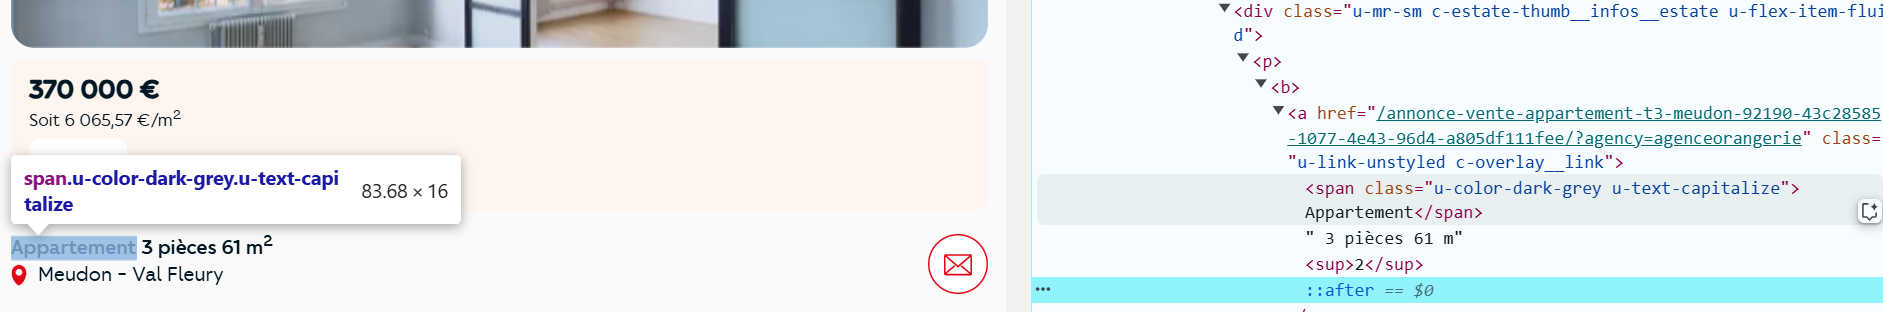

In [51]:
from bs4 import BeautifulSoup
import requests 

urlbase = 'https://www.orpi.com/'
urlbuy = 'agenceorangerie/acheter'
url = urlbase + urlbuy

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) ' +
                  'AppleWebKit/537.36 (KHTML, like Gecko) ' +
                  'Chrome/90.0.4430.93 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Referer': urlbase
}

page = requests.get(url, headers=headers)

soup = BeautifulSoup(page.content, "html.parser")

In [54]:
h = soup.find_all(class_="u-link-unstyled c-overlay__link")
# h[0].get_text(strip=True)
title = [k.get_text(strip=True) for k in h]
title

['Appartement3 pièces 61 m2',
 'Appartement2 pièces 43,90 m2',
 'Appartement4 pièces 86 m2',
 'Appartement2 pièces 39,32 m2',
 'Appartement3 pièces 82 m2',
 'Appartement5 pièces 106 m2',
 'Appartement3 pièces 72 m2',
 'Maison5 pièces 125 m2',
 'Appartement2 pièces 37,30 m2']

In [55]:
l = soup.find_all(class_="u-link-unstyled c-overlay__link")
link = [k['href'] for k in l]
link

['/annonce-vente-appartement-t3-meudon-92190-43c28585-1077-4e43-96d4-a805df111fee/?agency=agenceorangerie',
 '/annonce-vente-appartement-t2-chaville-92370-da199649-15fa-41af-9fd0-c2f1b5cafc58/?agency=agenceorangerie',
 '/annonce-vente-appartement-t4-chaville-92370-02d7d0a2-af8f-43a3-ad24-e35a846afe6f/?agency=agenceorangerie',
 '/annonce-vente-appartement-t2-chaville-92370-598a7ffa-499a-4890-bb4c-e95e10acf50c/?agency=agenceorangerie',
 '/annonce-vente-appartement-t3-chaville-92370-cad14748-9d6c-4b54-bd58-eac084ee38ef/?agency=agenceorangerie',
 '/annonce-vente-appartement-t5-chaville-92370-0e53fb27-d9bc-48a1-9624-f5bad87e80ec/?agency=agenceorangerie',
 '/annonce-vente-appartement-t3-meudon-92190-d689e0d8-1cbb-406b-8978-d5ddd3b43990/?agency=agenceorangerie',
 '/annonce-vente-maison-t5-chaville-92370-c3973db6-008b-426f-8198-3198c5ab4f89/?agency=agenceorangerie',
 '/annonce-vente-appartement-t2-chaville-92370-e07da876-abe1-4a65-ac7e-459687df6bad/?agency=agenceorangerie']

In [56]:
i = soup.find_all(class_="c-overlay__zoom")
img = [k['data-src'] for k in i]
img

['https://cutjhqvjma.cloudimg.io/_prod_%2Fsweepbright-s3%2F43c28585-1077-4e43-96d4-a805df111fee--bdfbc23c-7b64-4728-a186-3f26ec7844ae.jpg?p=estate-result-item&ci_url_encoded=1&ci_sign=9c47734326d60b5ec38274ade65686144b2fa81e',
 'https://cutjhqvjma.cloudimg.io/_prod_%2Fsweepbright-s3%2Fda199649-15fa-41af-9fd0-c2f1b5cafc58--053d5313-341e-468e-b6d2-60800cf20de8.jpg?p=estate-result-item&ci_url_encoded=1&ci_sign=03e9bbc654d77ea3df3f709766251f6e9d84fcf7',
 'https://cutjhqvjma.cloudimg.io/_prod_%2Fsweepbright-s3%2F02d7d0a2-af8f-43a3-ad24-e35a846afe6f--56a177db-6e42-42e1-8277-a6e7cfc03b90.jpg?p=estate-result-item&ci_url_encoded=1&ci_sign=04d98b502bfae1f47d4338b1305e8a756dab3a02',
 'https://cutjhqvjma.cloudimg.io/_prod_%2Fsweepbright-s3%2F598a7ffa-499a-4890-bb4c-e95e10acf50c--fd77567b-a16b-4742-8f8b-a0d6062138b9.jpg?p=estate-result-item&ci_url_encoded=1&ci_sign=01ffd4beb5c2ef765de31d4e0eaf807dc4fda261',
 'https://cutjhqvjma.cloudimg.io/_prod_%2Fsweepbright-s3%2Fcad14748-9d6c-4b54-bd58-eac084ee3

In [59]:
p = soup.find_all(class_="c-estate-thumb__price-tag")
price = [int(k.get_text(strip=True).replace(u'\xa0', u'').replace(u'€', u'')) for k in p]
price

[370000, 240000, 479000, 255000, 360000, 516000, 349000, 945000, 280000]

In [60]:
import pandas as pd
pd.DataFrame(zip(title,price,link),columns=["title","price","link"])

,title,price,link
0,Appartement3 pièces 61 m2,370000,/annonce-vente-appartement-t3-meudon-92190-43c...
1,"Appartement2 pièces 43,90 m2",240000,/annonce-vente-appartement-t2-chaville-92370-d...
2,Appartement4 pièces 86 m2,479000,/annonce-vente-appartement-t4-chaville-92370-0...
3,"Appartement2 pièces 39,32 m2",255000,/annonce-vente-appartement-t2-chaville-92370-5...
4,Appartement3 pièces 82 m2,360000,/annonce-vente-appartement-t3-chaville-92370-c...
5,Appartement5 pièces 106 m2,516000,/annonce-vente-appartement-t5-chaville-92370-0...
6,Appartement3 pièces 72 m2,349000,/annonce-vente-appartement-t3-meudon-92190-d68...
7,Maison5 pièces 125 m2,945000,/annonce-vente-maison-t5-chaville-92370-c3973d...
8,"Appartement2 pièces 37,30 m2",280000,/annonce-vente-appartement-t2-chaville-92370-e...


## Selenium

https://realpython.com/modern-web-automation-with-python-and-selenium/


Download Chrome driver (version 95 here):

https://sites.google.com/chromium.org/driver/

In [1]:
import pandas as pd
import os

os.listdir()

['2022 immo search - Meudon - Sheet1.csv',
 'chromedriver.exe',
 'env',
 'requirements.txt',
 'scraper.ipynb']

In [4]:
df = pd.read_csv("2022 immo search - Meudon - Sheet1.csv")
df['URL'][0]

'https://www.seloger.com/annonces/achat/appartement/meudon-92/bas-meudon/179545595.htm?projects=2&types=2,1&places=[{%22inseeCodes%22:[920048]}]&price=NaN/500000&surface=60/NaN&mandatorycommodities=0&enterprise=0&qsVersion=1.0&m=map_to_detail'

In [5]:
from selenium import webdriver
browser = webdriver.Chrome('chromedriver.exe')


C:\Users\ydebray\AppData\Local\Temp/ipykernel_2328/60826164.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome('chromedriver.exe')


In [6]:
browser.get(df['URL'][0])

# browser.quit()

enter login / password

## Elements of the page

In [10]:
# Price
el = browser.find_element_by_xpath('//*[@id="__next"]/div/main/div[3]/div/div[1]/div[1]/div[3]/div/div[2]/div[1]/div/span/span')
el.text

C:\Users\ydebray\AppData\Local\Temp/ipykernel_2328/2627604637.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  el = browser.find_element_by_xpath('//*[@id="__next"]/div/main/div[3]/div/div[1]/div[1]/div[3]/div/div[2]/div[1]/div/span/span')


'422 000 €'

In [11]:
# Size
xpath = '//*[@id="__next"]/div/main/div[3]/div/div[1]/div[1]/div[3]/div/div[1]/div[2]/div[3]'
el = browser.find_element_by_xpath(xpath)
el.text

C:\Users\ydebray\AppData\Local\Temp/ipykernel_2328/2578299079.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  el = browser.find_element_by_xpath(xpath)


'65 m²'

In [14]:
# Photo
xpath = '//*[@id="__next"]/div/main/div[3]/div/div[1]/div[1]/div[2]/div/div[1]/div[2]/div[2]/div/div[2]/img'
el = browser.find_element_by_xpath(xpath)
src = el.get_attribute('src')
src

C:\Users\ydebray\AppData\Local\Temp/ipykernel_2328/2330710195.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  el = browser.find_element_by_xpath(xpath)


'https://v.seloger.com/s/cdn/x/visuels/0/i/s/0/0is05hby2aevm4xd9rnxpk2zie9y3prod76g0exk8.jpg'

In [ ]:
# from PIL import Image
# im = Image.open(src)
# im.show()

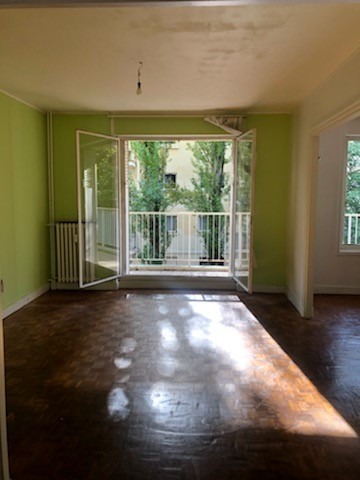

In [18]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get(src)
img = Image.open(BytesIO(response.content))
img

## Loop on pages

In [19]:
links = list(df['URL'])
links

['https://www.seloger.com/annonces/achat/appartement/meudon-92/bas-meudon/179545595.htm?projects=2&types=2,1&places=[{%22inseeCodes%22:[920048]}]&price=NaN/500000&surface=60/NaN&mandatorycommodities=0&enterprise=0&qsVersion=1.0&m=map_to_detail',
 'https://www.seloger.com/annonces/achat/appartement/meudon-92/bellevue/177480361.htm?projects=2&types=2,1&places=[{%22inseeCodes%22:[920048]}]&price=NaN/500000&surface=60/NaN&mandatorycommodities=0&enterprise=0&qsVersion=1.0&m=map_to_detail',
 'https://www.seloger.com/annonces/achat/appartement/meudon-92/179698397.htm?projects=2&types=2,1&places=[{%22inseeCodes%22:[920048]}]&price=NaN/500000&surface=60/NaN&mandatorycommodities=0&enterprise=0&qsVersion=1.0&m=map_to_detail',
 'https://www.seloger.com/annonces/achat/appartement/meudon-92/bellevue/179701659.htm?projects=2&types=2,1&places=[{%22inseeCodes%22:[920048]}]&price=NaN/500000&surface=60/NaN&mandatorycommodities=0&enterprise=0&qsVersion=1.0&m=map_to_detail',
 'https://www.seloger.com/annon

In [21]:
from urllib.parse import urlparse
urlparse(links[0]).hostname

'www.seloger.com'

In [22]:
links = [link if urlparse(link).hostname == "www.seloger.com" else "" for link in links]
links

['https://www.seloger.com/annonces/achat/appartement/meudon-92/bas-meudon/179545595.htm?projects=2&types=2,1&places=[{%22inseeCodes%22:[920048]}]&price=NaN/500000&surface=60/NaN&mandatorycommodities=0&enterprise=0&qsVersion=1.0&m=map_to_detail',
 'https://www.seloger.com/annonces/achat/appartement/meudon-92/bellevue/177480361.htm?projects=2&types=2,1&places=[{%22inseeCodes%22:[920048]}]&price=NaN/500000&surface=60/NaN&mandatorycommodities=0&enterprise=0&qsVersion=1.0&m=map_to_detail',
 'https://www.seloger.com/annonces/achat/appartement/meudon-92/179698397.htm?projects=2&types=2,1&places=[{%22inseeCodes%22:[920048]}]&price=NaN/500000&surface=60/NaN&mandatorycommodities=0&enterprise=0&qsVersion=1.0&m=map_to_detail',
 'https://www.seloger.com/annonces/achat/appartement/meudon-92/bellevue/179701659.htm?projects=2&types=2,1&places=[{%22inseeCodes%22:[920048]}]&price=NaN/500000&surface=60/NaN&mandatorycommodities=0&enterprise=0&qsVersion=1.0&m=map_to_detail',
 'https://www.seloger.com/annon

In [27]:
links.remove('')
links

['https://www.seloger.com/annonces/achat/appartement/meudon-92/bas-meudon/179545595.htm?projects=2&types=2,1&places=[{%22inseeCodes%22:[920048]}]&price=NaN/500000&surface=60/NaN&mandatorycommodities=0&enterprise=0&qsVersion=1.0&m=map_to_detail',
 'https://www.seloger.com/annonces/achat/appartement/meudon-92/bellevue/177480361.htm?projects=2&types=2,1&places=[{%22inseeCodes%22:[920048]}]&price=NaN/500000&surface=60/NaN&mandatorycommodities=0&enterprise=0&qsVersion=1.0&m=map_to_detail',
 'https://www.seloger.com/annonces/achat/appartement/meudon-92/179698397.htm?projects=2&types=2,1&places=[{%22inseeCodes%22:[920048]}]&price=NaN/500000&surface=60/NaN&mandatorycommodities=0&enterprise=0&qsVersion=1.0&m=map_to_detail',
 'https://www.seloger.com/annonces/achat/appartement/meudon-92/bellevue/179701659.htm?projects=2&types=2,1&places=[{%22inseeCodes%22:[920048]}]&price=NaN/500000&surface=60/NaN&mandatorycommodities=0&enterprise=0&qsVersion=1.0&m=map_to_detail',
 'https://www.seloger.com/annon

Alternative: `mylist.find('seloger')` or `import re; r = re.compile("pattern"); newlist = list(filter(r.match, mylist))`

In [28]:
import time
prices = []
sizes = []
photos = []

for link in links:
    browser.get(link)
    time.sleep(2)
    try:
        # Price
        p = browser.find_element_by_xpath('//*[@id="__next"]/div/main/div[3]/div/div[1]/div[1]/div[3]/div/div[2]/div[1]/div/span/span')
        prices.append(p.text)
        xpath = '//*[@id="__next"]/div/main/div[3]/div/div[1]/div[1]/div[3]/div/div[1]/div[2]/div[3]'
        s = browser.find_element_by_xpath(xpath)
        sizes.append(s.text)
        xpath = '//*[@id="__next"]/div/main/div[3]/div/div[1]/div[1]/div[2]/div/div[1]/div[2]/div[2]/div/div[2]/img'
        el = browser.find_element_by_xpath(xpath)
        src = el.get_attribute('src')
        photos.append(src)
    except:
        pass

C:\Users\ydebray\AppData\Local\Temp/ipykernel_2328/2651383276.py:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  p = browser.find_element_by_xpath('//*[@id="__next"]/div/main/div[3]/div/div[1]/div[1]/div[3]/div/div[2]/div[1]/div/span/span')
C:\Users\ydebray\AppData\Local\Temp/ipykernel_2328/2651383276.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  s = browser.find_element_by_xpath(xpath)
C:\Users\ydebray\AppData\Local\Temp/ipykernel_2328/2651383276.py:17: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  el = browser.find_element_by_xpath(xpath)


In [30]:
prices,sizes,photos

(['422 000 €', '332 170 €', '388 500 €', '483 000 €'],
 ['65 m²', '69 m²', '60,15 m²', '82 m²'],
 ['https://v.seloger.com/s/cdn/x/visuels/0/i/s/0/0is05hby2aevm4xd9rnxpk2zie9y3prod76g0exk8.jpg',
  'https://v.seloger.com/s/width/800/visuels/0/v/b/s/0vbssva4fqv4qb5vfb2z9nlo0efkibzgjzipbwlka.jpg',
  'https://v.seloger.com/s/width/800/visuels/0/g/n/0/0gn0vk9hd7e8ditveohleail9szxdudk9ut6ywzhc.jpg',
  'https://v.seloger.com/s/width/800/visuels/0/r/z/2/0rz2ipk5zyijacpyqdv0h805zgdk3dipxn2idwwzk.jpg'])